## Synthetic Minority Oversampling Technique (SMOTE)
### Using SMOTE to oversample the minority classes

In [93]:
#Generic library imports and data import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np
import pandas as pd
import csv
import ast
%matplotlib inline
import matplotlib.pyplot as plt

data = pd.read_csv('../Data_sets/Master_cleaned.csv')

#Functions

def remove_unwanted_observations(data, unwanted_observations = ["['Oily', 'Sensitive']",
                                                                "['Dry', 'Normal', 'Oily']",
                                                                "['Dry', 'Oily']",
                                                                "['Dry', 'Normal', 'Oily', 'Sensitive']",
                                                                "['Combination', 'Dry', 'Oily', 'Sensitive']",
                                                                "['Normal', 'Oily']"
                                                                ]):
    for observation in unwanted_observations:
        data = data[data.Skin_Type != observation]
    
    return data

In [110]:
# Specific Libary imports and functions
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from skmultilearn.problem_transform import LabelPowerset, BinaryRelevance, ClassifierChain
from sklearn.model_selection import KFold, GridSearchCV, cross_validate, cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics

kf = KFold(n_splits=5, shuffle = True, random_state=1024)

def grid_search (model, search_space):
    pipe = Pipeline([("classifier", model)])
    gs = GridSearchCV(pipe, search_space, scoring = "accuracy", cv= kf)
    gs.fit(X_train, y_train)
    return gs.best_estimator_.get_params()["classifier"]

def rfc_grid_search(model, hyperparameters):
    gs = GridSearchCV(model, hyperparameters, scoring = ham_loss, cv= kf)
    gs.fit(X_train, y_train)
    return gs.best_estimator_.get_params()

def get_cross_val_results (clf, base_classifier, X, y, X_test,y_test):
    try: 
        model = clf(classifier = best_classifier)
    except TypeError:
        model = clf(base_classifier = best_classifier)
    results = cross_validate(model, X, y, cv= kf, scoring =('accuracy', "f1_weighted"), return_train_score = True)
    # train results 
    train_accuracy = results['train_accuracy'].mean()
    train_f1 = results['train_f1_weighted']
    print(model)
    print("Training Accuracy = %.04f +/- %.04f" % (train_accuracy.mean(), train_accuracy.std()*2))
    print("Training F1 Score = %.04f +/- %.04f" % (train_f1.mean(), train_f1.std()*2))

    # test results
    y_pred = cross_val_predict(model, X_test, y_test, cv=kf)
    test_accuracy = results['test_accuracy'].mean()
    test_f1 = results['test_f1_weighted']
    print("Test Accuracy = %.04f +/- %.04f" % (test_accuracy.mean(), test_accuracy.std()*2))
    print("Test F1 Score = %.04f +/- %.04f" % (test_f1.mean(), test_f1.std()*2))
    print("Hamming Loss = %.04f" % metrics.hamming_loss(y_test, y_pred))

In [103]:
data = remove_unwanted_observations(data)
X = data[data.columns[17:28]].values
y = data.Skin_Type
counter = Counter(y)
print(counter)

Counter({"['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']": 918, "['Combination', 'Dry', 'Normal', 'Oily']": 239, "['Combination', 'Normal', 'Oily']": 113, "['Combination', 'Oily']": 91, "['Normal']": 83, "['Dry', 'Normal']": 72, "['Dry']": 71, "['Combination', 'Dry', 'Normal']": 66, "['Combination', 'Dry', 'Normal', 'Sensitive']": 61, "['Combination']": 59, "['Sensitive']": 46, "['Combination', 'Normal']": 30, "['Dry', 'Normal', 'Sensitive']": 29, "['Oily']": 26, "['Combination', 'Normal', 'Oily', 'Sensitive']": 23, "['Combination', 'Dry']": 22, "['Dry', 'Sensitive']": 19, "['Combination', 'Dry', 'Oily']": 13, "['Normal', 'Sensitive']": 12, "['Combination', 'Oily', 'Sensitive']": 10, "['Combination', 'Dry', 'Sensitive']": 7})


In [104]:
#SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.3, random_state = 1024, stratify=y)
num = 100
num2 = 50

# summarize the class distribution
counter = Counter(y_train)
print(f"Before resampling:\n{counter}\n") 

oversample = SMOTE(k_neighbors = 3, sampling_strategy = {"['Combination', 'Normal', 'Oily']": num, 
                                                         "['Combination', 'Oily']": num,
                                                         "['Dry']": num,
                                                         "['Normal']": num,
                                                         "['Combination', 'Dry', 'Normal', 'Sensitive']": num,
                                                         "['Dry', 'Normal']": num,
                                                         "['Combination', 'Dry', 'Normal']": num,
                                                         "['Combination']": num,
                                                         "['Sensitive']": num2,
                                                         "['Combination', 'Normal']": num2,
                                                         "['Dry', 'Normal', 'Sensitive']": num2,
                                                         "['Dry', 'Sensitive']": num2,
                                                         "['Combination', 'Dry']": num2,
                                                         "['Oily']": num2,
                                                         "['Combination', 'Normal', 'Oily', 'Sensitive']": num2,
                                                         "['Combination', 'Dry', 'Oily']": num2,
                                                         "['Normal', 'Sensitive']": num2,
                                                         "['Combination', 'Oily', 'Sensitive']": num2,
                                                         "['Combination', 'Dry', 'Sensitive']": num2
                                                        })
X_train, y_train = oversample.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(f"After resampling:\n{counter}\n") 

Before resampling:
Counter({"['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']": 643, "['Combination', 'Dry', 'Normal', 'Oily']": 167, "['Combination', 'Normal', 'Oily']": 79, "['Combination', 'Oily']": 64, "['Normal']": 58, "['Dry', 'Normal']": 50, "['Dry']": 50, "['Combination', 'Dry', 'Normal']": 46, "['Combination', 'Dry', 'Normal', 'Sensitive']": 43, "['Combination']": 41, "['Sensitive']": 32, "['Combination', 'Normal']": 21, "['Dry', 'Normal', 'Sensitive']": 20, "['Oily']": 18, "['Combination', 'Dry']": 16, "['Combination', 'Normal', 'Oily', 'Sensitive']": 16, "['Dry', 'Sensitive']": 13, "['Combination', 'Dry', 'Oily']": 9, "['Normal', 'Sensitive']": 9, "['Combination', 'Oily', 'Sensitive']": 7, "['Combination', 'Dry', 'Sensitive']": 5})

After resampling:
Counter({"['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']": 643, "['Combination', 'Dry', 'Normal', 'Oily']": 167, "['Normal']": 100, "['Combination', 'Dry', 'Normal', 'Sensitive']": 100, "['Combination']": 100, "['Com

Dataset sizes:
	Train (2160, 11)
	Test (603, 11)


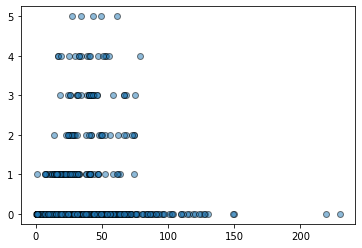

In [105]:
print("Dataset sizes:\n\tTrain %s\n\tTest %s" % (X_train.shape, X_test.shape))

plot = plt.scatter(X_train[:, 0], X_train[:, 1], alpha=0.5, edgecolor='k')

In [106]:
y_train = y_train.apply(ast.literal_eval)
y_test = y_test.apply(ast.literal_eval)

mlb=MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train)
y_test = mlb.transform(y_test)
mlb.classes_

array(['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive'], dtype=object)

## Results after running SMOTE

In [107]:
search_space1 = [{'classifier':[DecisionTreeClassifier()], 'classifier__max_depth' :[5,6,7,8,9],
    'classifier__max_leaf_nodes': [5,6,7,8,9,10,15]},{'classifier': [RandomForestClassifier()], 'classifier__n_estimators': [5,8,10,12,14,15],'classifier__max_features': [[8,9,10,11], "auto", 'sqrt', 'log2']}, {'classifier': [SVC()], 'classifier__kernel':['rbf', 'linear']},{'classifier': [MultinomialNB()], 'classifier__alpha': [.7, 1.0]}]

In [108]:
kf = KFold(n_splits=5, shuffle = True, random_state=1024)
ham_loss = metrics.make_scorer(metrics.hamming_loss, greater_is_better= False)
mlb2 = MultiLabelBinarizer()
y = mlb2.fit_transform(y)

In [111]:
model4 = RandomForestClassifier(random_state = 1024)
hyperparameters = {'n_estimators' :[4,5,8,10,15,20], "criterion" :['gini', 'entropy'], 'max_leaf_nodes': [5,6,7,8,9,10,15], 'max_features': [8,9,10,11]}
best_param = rfc_grid_search(model4, hyperparameters)

clf = [BinaryRelevance, ClassifierChain, LabelPowerset]
for classifier in clf:
    best_classifier = grid_search(classifier(), search_space1)
    get_cross_val_results(classifier,best_classifier, X_train, y_train, X_test, y_test)

C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

BinaryRelevance(classifier=RandomForestClassifier(max_features='log2',
                                                  n_estimators=15),
                require_dense=[True, True])
Training Accuracy = 0.8716 +/- 0.0000
Training F1 Score = 0.9685 +/- 0.0013
Test Accuracy = 0.3810 +/- 0.0000
Test F1 Score = 0.8081 +/- 0.0229
Hamming Loss = 0.3022


C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

ClassifierChain(classifier=RandomForestClassifier(max_features='sqrt',
                                                  n_estimators=15),
                require_dense=[True, True])
Training Accuracy = 0.9019 +/- 0.0000
Training F1 Score = 0.9648 +/- 0.0026
Test Accuracy = 0.4481 +/- 0.0000
Test F1 Score = 0.8095 +/- 0.0125
Hamming Loss = 0.2949


C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\zkidt\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 1029, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\zkidt\anaconda3\lib\site-packages\joblib\parallel.py", line 847, in dispatch_one_batch
    self._dispatch(tasks)

LabelPowerset(classifier=RandomForestClassifier(n_estimators=15),
              require_dense=[True, True])
Training Accuracy = 0.9171 +/- 0.0000
Training F1 Score = 0.9694 +/- 0.0033
Test Accuracy = 0.4597 +/- 0.0000
Test F1 Score = 0.8081 +/- 0.0203
Hamming Loss = 0.2876


In [112]:
rfc_SMOTE = RandomForestClassifier(random_state = 1024)
best_param = rfc_grid_search(rfc_SMOTE, hyperparameters)

In [113]:
best_param

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 10,
 'max_leaf_nodes': 15,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1024,
 'verbose': 0,
 'warm_start': False}

In [114]:
rfc_SMOTE = RandomForestClassifier(bootstrap= True, criterion= "entropy", max_features= 11, max_leaf_nodes= 15, n_estimators=10,random_state=1024)

# train results
results = cross_validate(rfc_SMOTE, X_train, y_train, cv= kf, scoring =('accuracy', "f1_weighted"), return_train_score = True)
train_accuracy = results['train_accuracy'].mean()
train_f1 = results['train_f1_weighted']
print("Training Accuracy = %.04f +/- %.04f" % (train_accuracy.mean(), train_accuracy.std()*2))
print("Training F1 Score = %.04f +/- %.04f" % (train_f1.mean(), train_f1.std()*2))

# test results
y_pred = cross_val_predict(rfc_SMOTE, X_test, y_test, cv=kf)
test_accuracy = results['test_accuracy']
test_f1 = results['test_f1_weighted']
print("Test Accuracy = %.04f +/- %.04f" % (test_accuracy.mean(), test_accuracy.std()*2))
print("Test F1 Score = %.04f +/- %.04f" % (test_f1.mean(), test_f1.std()*2))
print("Hamming Loss = %.04f" % (metrics.hamming_loss(y_test, y_pred)))

Training Accuracy = 0.2356 +/- 0.0000
Training F1 Score = 0.7832 +/- 0.0120
Test Accuracy = 0.2222 +/- 0.0308
Test F1 Score = 0.7731 +/- 0.0143
Hamming Loss = 0.2743
